
##**Classification-based Collaborative Filtering Systems**
1. User-user Collaborative Filtering
2. Item – item collaborative filtering


Recommendation systems can also be as simple as recommending a user profile for management decision making.



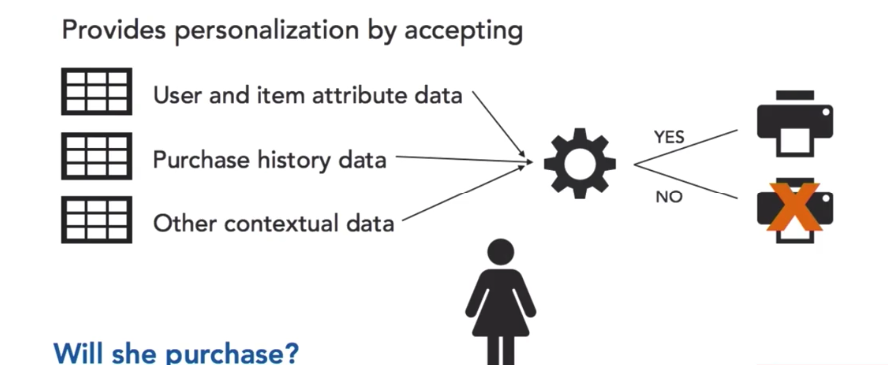

--> Based on the existing customers and product data, will this new customer purchase an insurance deal or not?

--> Based on the purchase history of this customer, whill she be intersted in our new offer.

--> which customers among our existing customers will be interested in our new product?

Here we are able to make personalised recommendations.

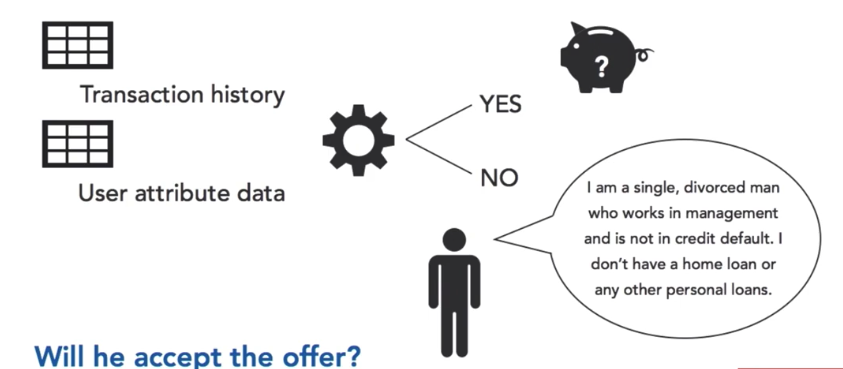

Imagine you are a marketing Data Scientits/ML Engineer in a certain bank. You need to decide wether a particular existing candidate is a good candidate for a special term deposit that the bank is currently running. If the client is a good candidate, then you will recommend him for a bank representative to reach out and make him the offer. 

Here we will use logistic regression to decide whether a customer is a good candidate for the offer and whether the client will accept the offer or not. This client is called George with his descriptive history as shown in the above image.

This is an example of user-based collaborative filtering.

## Logistic Regression as a Classifier

In [ ]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

This bank marketing dataset is open-sourced and available for download at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

It was originally created by: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [ ]:
bank_full = pd.read_csv('bank_full_w_dummy_vars.csv')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           45211 non-null  int64 
 1   job                           45211 non-null  object
 2   marital                       45211 non-null  object
 3   education                     45211 non-null  object
 4   default                       45211 non-null  object
 5   balance                       45211 non-null  int64 
 6   housing                       45211 non-null  object
 7   loan                          45211 non-null  object
 8   contact                       45211 non-null  object
 9   day                           45211 non-null  int64 
 10  month                         45211 non-null  object
 11  duration                      45211 non-null  int64 
 12  campaign                      45211 non-null  int64 
 13  pdays           

In [ ]:

#Ideally, we are supposed to treat all the categorical features differently and use get_dummies to create individual columns for each category.
#we will be focusing on our collaborative filtering instead worrying about data preprocessing.


from sklearn import preprocessing

le = preprocessing.LabelEncoder()

bank_full = bank_full.apply(le.fit_transform)
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,40,4,1,2,0,3036,1,0,2,4,...,0,0,0,0,0,0,0,1,0,0
1,26,9,2,1,0,945,1,0,2,4,...,0,0,0,0,0,0,0,0,1,1
2,15,2,1,1,0,918,1,1,2,4,...,0,0,0,0,0,0,0,1,0,0
3,29,1,1,3,0,2420,1,0,2,4,...,0,0,0,0,0,0,0,1,0,0
4,15,11,2,3,0,917,0,0,2,4,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_binary                    ',
       'housing_loan                ', 'credit_in_default', 'personal_loans',
       'prev_failed_to_subscribe    ', 'prev_subscribed             ',
       'job_management              ', 'job_tech                    ',
       'job_entrepreneur            ', 'job_bluecollar              ',
       'job_unknown                 ', 'job_retired                 ',
       'job_services                ', 'job_self_employed           ',
       'job_unemployed              ', 'job_maid                    ',
       'job_student                 ', 'married                     ',
       'single                      ', 'divorced                    '],
      dtype='object')

In [ ]:
new_bank_full= bank_full.loc[:,'housing_loan                ':'divorced                    ']

In [ ]:
new_bank_full

,housing_loan,credit_in_default,personal_loans,prev_failed_to_subscribe,prev_subscribed,job_management,job_tech,job_entrepreneur,job_bluecollar,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
45208,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
45209,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
bank_full['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
X = new_bank_full
y=bank_full['y']                    

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X, y)

LogisticRegression()

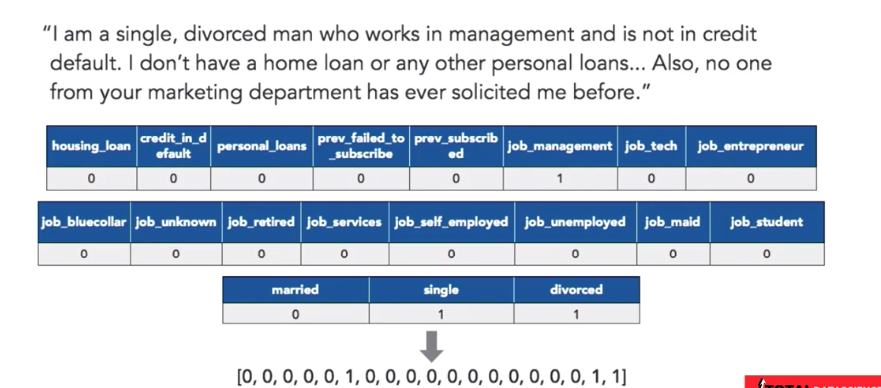

In [ ]:

new_user = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]).reshape(1, -1)
y_pred = LogReg.predict(new_user)
y_pred

array([0])

We will therefore not recommend George for the new offer since he is not even likely to accept the offer based on our recommendation engine.

# Evaluation of recommender systems

You can use both Classification and Regression metrics for evaluating recommendation engines.
1. RMSE
2. MAE
3. Accuracy
4. ROC/AUC 
5. Precision
6. Recall

In [ ]:
y_pred = LogReg.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.67      0.17      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.79      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [ ]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64